# Методы обработки и распознавания изображений 

## Практическое занятие 1: Введение в PyTorch

Сегодня мы познакомимся с библиотекой **PyTorch**. Она очень похожа на **NumPy**, с одним важным отличием — **PyTorch** может считать градиенты за вас. Таким образом вам не надо будет писать обратный проход в нейросетях.

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
# from sklearn.datasets import load_boston в новой версии датасет удалён
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

### 1. Сравнение **NumPy** и **PyTorch**

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [5]:
# случайная матрица
a = np.random.rand(5, 3)
a

array([[0.99044347, 0.39016252, 0.64551763],
       [0.64274829, 0.42131382, 0.82193026],
       [0.43530689, 0.51122615, 0.74752356],
       [0.30749036, 0.72572503, 0.24123954],
       [0.1859888 , 0.428383  , 0.90205209]])

In [6]:
# размеры массива
a.shape

(5, 3)

In [7]:
# сложение
a + 5

array([[5.99044347, 5.39016252, 5.64551763],
       [5.64274829, 5.42131382, 5.82193026],
       [5.43530689, 5.51122615, 5.74752356],
       [5.30749036, 5.72572503, 5.24123954],
       [5.1859888 , 5.428383  , 5.90205209]])

In [8]:
# матричное умножение
a @ a.T

array([[1.54989807, 1.33155718, 1.11314779, 0.74342691, 0.93364091],
       [1.33155718, 1.26620005, 1.10959164, 0.70167896, 1.04145156],
       [1.11314779, 1.10959164, 1.00963574, 0.68519453, 0.97426798],
       [0.74342691, 0.70167896, 0.68519453, 0.67942366, 0.58568866],
       [0.93364091, 1.04145156, 0.97426798, 0.58568866, 1.03180179]])

In [9]:
# среднее по колонкам
a.mean(axis=-1)

array([0.67537454, 0.62866412, 0.56468553, 0.42481831, 0.50547463])

In [10]:
# решейп
a.reshape(3, 5).shape

(3, 5)

#### Разминка

При помощи **NumPy** посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [12]:
# YOUR CODE
numbers = np.arange(1, 10001)
squares = np.power(numbers, 2)
result = np.sum(squares)
result

np.int64(333383335000)

Аналогичные операции в **PyTorch** очень похожи, но иногда имеют немного другой синтаксис

In [13]:
# случайный тензор
x = torch.rand(5, 3)
x

tensor([[0.9730, 0.3003, 0.7122],
        [0.5107, 0.2639, 0.7893],
        [0.4390, 0.3340, 0.5674],
        [0.2869, 0.5701, 0.8070],
        [0.0666, 0.9107, 0.1682]])

In [14]:
# размеры тензора
x.shape

torch.Size([5, 3])

In [15]:
# тоже размеры тензора
x.size()

torch.Size([5, 3])

In [16]:
# сложение
x + 5

tensor([[5.9730, 5.3003, 5.7122],
        [5.5107, 5.2639, 5.7893],
        [5.4390, 5.3340, 5.5674],
        [5.2869, 5.5701, 5.8070],
        [5.0666, 5.9107, 5.1682]])

In [17]:
# матричное умножение
# читайте документацию по различным вариантам: @, torch.mm, torch.matmul, torch.bmm
torch.matmul(x, x.transpose(1, 0))

tensor([[1.5441, 1.1383, 0.9316, 1.0251, 0.4581],
        [1.1383, 0.9535, 0.7602, 0.9339, 0.4071],
        [0.9316, 0.7602, 0.6263, 0.7743, 0.4288],
        [1.0251, 0.9339, 0.7743, 1.0585, 0.6740],
        [0.4581, 0.4071, 0.4288, 0.6740, 0.8620]])

In [18]:
# очередное матричное умножение
x.mm(x.t())

tensor([[1.5441, 1.1383, 0.9316, 1.0251, 0.4581],
        [1.1383, 0.9535, 0.7602, 0.9339, 0.4071],
        [0.9316, 0.7602, 0.6263, 0.7743, 0.4288],
        [1.0251, 0.9339, 0.7743, 1.0585, 0.6740],
        [0.4581, 0.4071, 0.4288, 0.6740, 0.8620]])

In [19]:
# поэлементное умножение
x * x

tensor([[0.9467, 0.0902, 0.5072],
        [0.2608, 0.0696, 0.6230],
        [0.1928, 0.1116, 0.3220],
        [0.0823, 0.3250, 0.6512],
        [0.0044, 0.8293, 0.0283]])

In [20]:
# среднее по колонкам
x.mean(dim=-1)

tensor([0.6618, 0.5213, 0.4468, 0.5547, 0.3818])

In [21]:
# решейп
x.view([3, 5]).shape

torch.Size([3, 5])

In [22]:
# или так
x.reshape([3, 5]).shape

torch.Size([3, 5])

In [23]:
# будьте внимательны и не используйте view для транспонирования осей!
x.view_as(x.t()) == x.t()

tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])

Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог **NumPy** операции в **PyTorch**


#### Разминка на pytorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [24]:
numbers = torch.arange(1, 10001)
squares = torch.pow(numbers, 2)
result  = torch.sum(squares)
result

tensor(333383335000)

### 2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций

In [26]:
# пустой тензор
x = torch.empty(5, 3)
x

tensor([[2.1707e-18, 7.0952e+22, 1.7748e+28],
        [1.8176e+31, 7.2708e+31, 5.0778e+31],
        [3.2608e-12, 1.7728e+28, 7.0367e+22],
        [2.1715e-18, 2.6727e+23, 5.2653e+22],
        [1.7155e-07, 2.6219e-09, 1.6517e-04]])

In [27]:
# случайный тензор ~ Uniform[0, 1)
x = torch.rand(5, 3)
x

tensor([[0.8380, 0.7974, 0.9662],
        [0.7908, 0.0271, 0.3637],
        [0.6589, 0.2572, 0.4001],
        [0.9644, 0.4815, 0.6008],
        [0.8390, 0.6251, 0.3127]])

In [28]:
# тензор с нулями и указанием типов чисел
x = torch.zeros(5, 3, dtype=torch.float32)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [29]:
# конструируем тензор из питоновского листа
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

In [30]:
# используем уже созданный тензор для создания тензора из единичек
x1 = x.new_ones(5, 3, dtype=torch.double)
x1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [31]:
# создаем случайный тензор с размерами другого тензора
x = torch.randn_like(x1, dtype=torch.float)
x

tensor([[ 1.4310, -1.1569,  0.5139],
        [-0.0135, -0.0070, -0.5042],
        [-0.7500,  0.6002,  2.2307],
        [ 0.6204, -0.4659,  0.2796],
        [-0.3229,  0.2967,  0.3577]])

In [32]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)

In [33]:
x

tensor([[0.9900, 0.8291, 0.6467],
        [0.0963, 0.3422, 0.1765],
        [0.6298, 0.8106, 0.7535],
        [0.3106, 0.9533, 0.1450],
        [0.1928, 0.5967, 0.7401]])

In [34]:
y

tensor([[0.6278, 0.1509, 0.5753],
        [0.5168, 0.9549, 0.2315],
        [0.5730, 0.3797, 0.6330],
        [0.8489, 0.5444, 0.1532],
        [0.6285, 0.2700, 0.8959]])

In [35]:
# сложение
x + y

tensor([[1.6178, 0.9800, 1.2220],
        [0.6130, 1.2971, 0.4080],
        [1.2029, 1.1902, 1.3865],
        [1.1595, 1.4977, 0.2982],
        [0.8213, 0.8667, 1.6360]])

In [36]:
# очередное сложение
z = torch.add(x, y)
z

tensor([[1.6178, 0.9800, 1.2220],
        [0.6130, 1.2971, 0.4080],
        [1.2029, 1.1902, 1.3865],
        [1.1595, 1.4977, 0.2982],
        [0.8213, 0.8667, 1.6360]])

In [37]:
# наконец, ещё одно сложение!
torch.add(x, y, out=x)
x

tensor([[1.6178, 0.9800, 1.2220],
        [0.6130, 1.2971, 0.4080],
        [1.2029, 1.1902, 1.3865],
        [1.1595, 1.4977, 0.2982],
        [0.8213, 0.8667, 1.6360]])

In [38]:
# добавили измерение в начало
x.unsqueeze(0).size()

torch.Size([1, 5, 3])

In [39]:
# убрали одно единичное измерение
x.unsqueeze(0).unsqueeze(1).squeeze(0).size()

torch.Size([1, 5, 3])

In [40]:
# убрали все единичные измерения
x.unsqueeze(0).unsqueeze(1).squeeze().size()

torch.Size([5, 3])

In [41]:
# операции без _ не меняют тензор, а создают копию
x.unsqueeze(0)
x.size()

torch.Size([5, 3])

In [42]:
# операции с _ меняют тензор
x.unsqueeze_(0)
x.size()

torch.Size([1, 5, 3])

Мы можем делать обычные срезы и переводить матрицы из **PyTorch** в **NumPy** и наоборот:

In [43]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
np.allclose(x.numpy(), a)

True

In [44]:
np.allclose(x.numpy()[:, 1], a[:, 1])

True

In [42]:
torch.from_numpy(x.numpy())

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

### 3. Работаем с градиентами руками

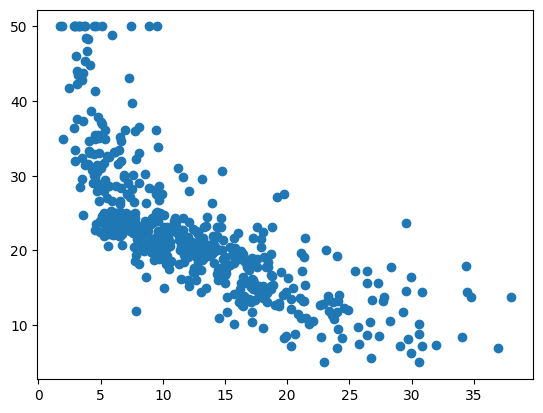

In [46]:
import pandas as pd
def load_boston():
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    
    # Создаем объект с атрибутами .data и .target
    class BostonDataset:
        def __init__(self, data, target):
            self.data = data
            self.target = target
    
    return BostonDataset(data, target)


boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target);

В **PyTorch** есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

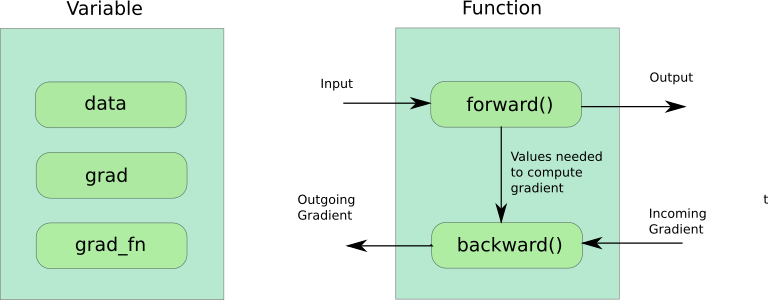

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенты для всех тензоров, у которых `requires_grad=True`.

In [48]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [49]:
x.size(), y.size()

(torch.Size([506]), torch.Size([506]))

In [50]:
y_pred = w * x + b
loss = torch.mean((y_pred - y) ** 2)
loss.backward()

In [51]:
# сделали операции и посчитали градиенты, появилось значение соответствующих полей
assert w.grad is not None
assert b.grad is not None

print(f"dL/dw = {w.grad}")
print(f"dL/db = {b.grad}")

dL/dw = tensor([-12.2041])
dL/db = tensor([-44.3012])


Для доступа к значениям в тензоре используйте атрибут `.data`:

In [52]:
w.data, w.grad

(tensor([0.1692]), tensor([-12.2041]))

In [53]:
w

tensor([0.1692], requires_grad=True)

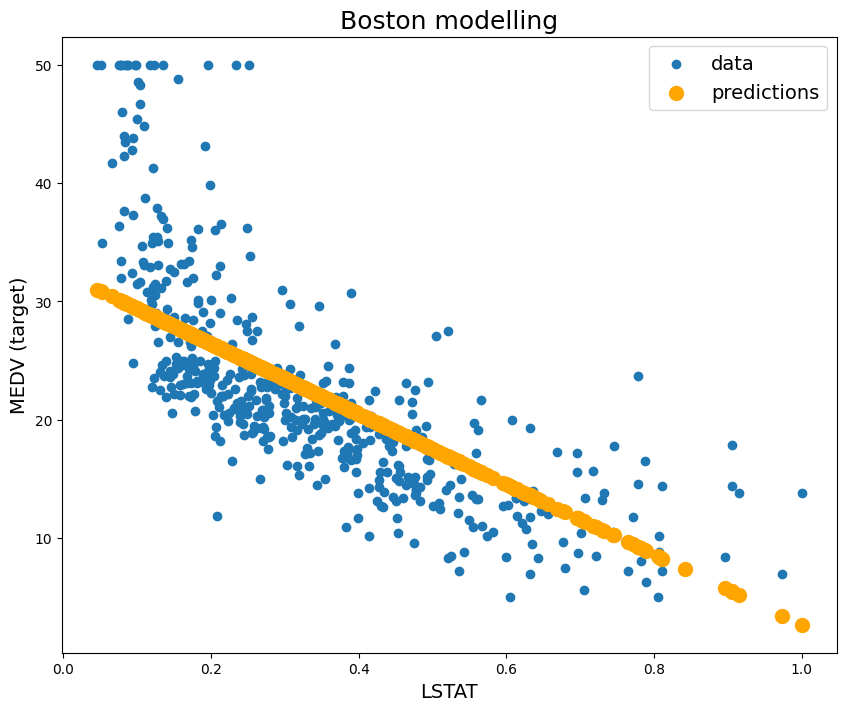

loss =  39.93451


In [55]:
from IPython.display import clear_output

for i in range(300):
    y_pred = w * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y) ** 2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -= 0.05 * w.grad
    b.data -= 0.05 * b.grad

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10, 8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(
            x.data.numpy(),
            y_pred.data.numpy(),
            color="orange",
            linewidth=5,
            label="predictions",
        )
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.1:
            print("Done!")
            break

### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросети в **PyTorch**, нужно освоить три вещи:

1. Как формировать батчи и подавать их на вход сети
2. Как задать архитектуру сети
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы иметь возможность итерироваться по данным и применять к ним преобразования (например, аугментации, о которых вы узнаете позже), нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

У такого класса **должно быть** три метода:

* `__init__` — создаёт поля класса (например, путь к папке с файлами с тренировочными объектами)
* `__len__` — возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` — по индексу возвращает семпл и таргет к нему


Давайте напишем такой сами, в качестве данных используя рандомные значения.

In [56]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return {
            "sample": torch.tensor(self.x[idx, :], dtype=torch.float),
            "target": self.y[idx],
        }

In [57]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [58]:
our_dataset = RandomDataset(x, y)

In [59]:
our_dataset.__getitem__(999)

{'sample': tensor([0.7497, 0.7966, 0.5374, 0.7880, 0.6593]),
 'target': np.float64(0.1801135066336671)}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Посмотрим на пример:

In [60]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [61]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.7189, 0.3973, 0.8685, 0.9528, 0.4046],
        [0.3680, 0.2183, 0.8796, 0.1825, 0.9305],
        [0.4238, 0.6648, 0.0296, 0.1508, 0.3178],
        [0.9173, 0.0931, 0.9094, 0.3411, 0.2271]])
Target:
tensor([0.7949, 0.0550, 0.1546, 0.6044], dtype=torch.float64)


#### Как сделать нейросеть

Для того, чтобы в high-level **PyTorch** создавать нейросети, используется модуль `torch.nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [62]:
model = nn.Sequential()  # создаем пустую модель, в которую будем добавлять слои
model.add_module(
    "l1", nn.Linear(5, 30)
)  # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module("l2", nn.ReLU())  # добавили функцию активации
model.add_module(
    "l3", nn.Linear(30, 1)
)  # добавили слой с 3-мя нейронами на вход и 5-ю на выход

# альтернативный способ
another_model = nn.Sequential(nn.Linear(5, 30), nn.ReLU(), nn.Linear(30, 1))

In [63]:
y_pred = model(batch["sample"])  # получили предсказания модели

#### Как написать цикл обучения и отслеживать метрики
 
Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [64]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", train=True, download=True, transform=torchvision.transforms.ToTensor()
)
mnist_val = torchvision.datasets.MNIST(
    "./mnist/", train=False, download=True, transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
)

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=False, num_workers=1
)

100.0%
100.0%
100.0%
100.0%


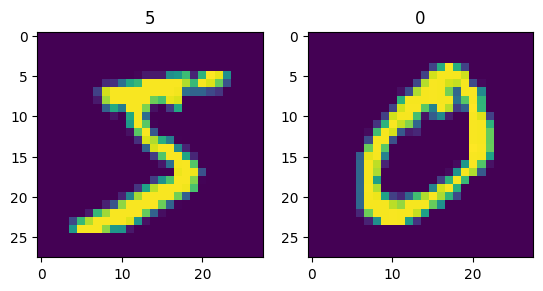

In [71]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [72]:
model = nn.Sequential(
    nn.Flatten(),  # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(
        28 * 28, 128
    ),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),  # нелинейность
    nn.Linear(
        128, 10
    ),  # линейный слой, преобразующий вектор размера 128 в вектор размера 10
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

Веса моделей хранятся в виде матриц и выглядят так:

In [63]:
[x for x in model.named_parameters()]

[('1.weight',
  Parameter containing:
  tensor([[ 0.0351, -0.0069,  0.0145,  ...,  0.0152,  0.0050,  0.0240],
          [-0.0315, -0.0120, -0.0250,  ..., -0.0285,  0.0257,  0.0255],
          [-0.0065, -0.0129, -0.0349,  ..., -0.0105, -0.0329, -0.0180],
          ...,
          [-0.0331, -0.0014,  0.0179,  ...,  0.0302,  0.0010, -0.0075],
          [ 0.0066, -0.0233,  0.0023,  ...,  0.0177, -0.0349,  0.0137],
          [ 0.0205, -0.0166,  0.0348,  ...,  0.0249,  0.0086, -0.0212]],
         requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([ 0.0248,  0.0346,  0.0282, -0.0256,  0.0264,  0.0319, -0.0098,  0.0317,
          -0.0277, -0.0324, -0.0278, -0.0193, -0.0119, -0.0144, -0.0017,  0.0249,
           0.0100, -0.0320,  0.0149,  0.0323,  0.0270, -0.0213,  0.0319, -0.0047,
          -0.0317, -0.0229,  0.0055,  0.0157,  0.0056,  0.0044,  0.0080,  0.0127,
           0.0200,  0.0288,  0.0241, -0.0275, -0.0057,  0.0331,  0.0278,  0.0351,
           0.0144, -0.0252,  0.0275, 

In [80]:
# всего у нас будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):  # берем батч из трейн лоадера
        y_pred = model(x_train)  # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train)  # считаем лосс
        loss.backward()  # считаем градиенты обратным проходом
        optimizer.step()  # обновляем параметры сети
        optimizer.zero_grad()  # обнуляем посчитанные градиенты параметров

    if epoch % 2 == 0:
        val_loss = []  # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad():  # на валидации запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(
                val_dataloader
            ):  # берем батч из валидационного лоадера
                y_pred = model(x_val)  # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val)  # считаем лосс
                val_loss.append(loss.numpy())  # добавляем в массив
                val_accuracy.extend(
                    (torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist()
                )

        # печатаем метрики
        print(
            f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}"
        )

Exception ignored in: <function tqdm.__del__ at 0x7a2f4695fd80>
Traceback (most recent call last):
  File "/home/sasha/miniconda3/envs/cv_course/lib/python3.13/site-packages/tqdm/std.py", line 1148, in __del__
    self.close()
  File "/home/sasha/miniconda3/envs/cv_course/lib/python3.13/site-packages/tqdm/notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

ДЗ: Вам необходимо переписать алгоритм обучения нейронной сети, с целью повышения значения accuracy. Можно пробовать оптимизировать код, саму нейронку или параметры обучения.